<a href="https://colab.research.google.com/github/r7sy/SuttonBarto-RL2018-Sols/blob/master/Chapter%2006/Windy_Stochastic_windy_Gridworld_with_king's_moves_Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Windy gridworld : Sarsa

This notebook implements example 6.5 from "Reinforcement Learning an Introduction second edition"  by Richard S. Sutton and Andrew G. Barto. It also contains the solution to exercises 6.9 and  6.10; The problem is defined in the book as follows:

>"Windy Gridworld Shown inset below is a standard gridworld, with
start and goal states, but with one di↵erence: there is a crosswind running upward
through the middle of the grid. The actions are the standard four—up, down, right,
and left—but in the middle region the resultant next states are shifted upward by a
“wind,” the strength of which varies from column to column. The strength of the wind is given below each column, in number of cells shifted upward. For example, if you are one cell to the
right of the goal, then the action
left takes you to the cell just above
the goal. This is an undiscounted
episodic task, with constant rewards
of 1 until the goal state is reached."

The notebook implements the Sarsa algorithm described on page 130 of the book to solve this problem.

In [0]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline



In [0]:
class GridWorld:
  
  def __init__(self,shape,actions,start=np.array((0,4)),goal=np.array([7,4]),wind_values=np.array([0,0,0,1,1,1,2,2,1,0]),variance=0.0):
    self.gridWorld=np.zeros(shape=shape)
    self.variance=variance
    self.start=start
    self.goal=goal
    self.wind_values=wind_values
    self.position=tuple(self.start)
    self.actions=actions
    
    
  def visualizeTrajectory(self,states=np.array([])):
    #intended for short episodes only.
    fig=plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(np.transpose((self.gridWorld)),origin='lower',vmin=0, vmax=1)
    ax.set_xticks(range(self.gridWorld.shape[0]))
    ax.set_yticks(range(self.gridWorld.shape[1]))
    ax.grid(True,which='both',color='k')
    circ = Circle(self.goal,0.3,fill=False,color='g',linewidth=2)
    circ2 = Circle(self.start,0.3,fill=False,color='r',linewidth=2)
    ax.add_patch(circ)
    ax.add_patch(circ2)
    states=np.array(states)
    for i in range(len(states)):
      plt.scatter(states[i][0],states[i][1])
    plt.plot(*zip(*states)) 
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend([circ,circ2], ['Goal','Start'],loc='center left', bbox_to_anchor=(1, 0.5))
    return fig
    
  def goToStartingState(self):
    self.position=tuple(self.start)
    
  def performAction(self,action):
    next_x=self.position[0]+self.actions[action][0]
    next_y=self.position[1]+self.actions[action][1] + int(np.random.choice([self.wind_values[self.position[0]],self.wind_values[self.position[0]]+self.variance,self.wind_values[self.position[0]]-self.variance],1))
    self.position=(max(min(next_x,self.gridWorld.shape[0]-1),0),max(min(next_y,self.gridWorld.shape[1]-1),0))
    if self.position==tuple(self.goal):
      current_state=self.position
      self.goToStartingState()
      return current_state,0
    return self.position,-1
    

In [0]:
class SarsaAgent:
  def __init__(self,gridWorld):
    self.gridWorld=gridWorld
    self.actions_number=len(self.gridWorld.actions)
    self.q_values=np.zeros(self.gridWorld.gridWorld.shape+(self.actions_number,))
    
        
  def epsilonGreedy(self,state,epsilon):
    rand_number=np.random.uniform()
    if rand_number>=epsilon:
      greedy_action=np.argmax(self.q_values[state])
      return greedy_action
    return np.random.choice(range(self.actions_number))

  def getAverageEpisodeLength(self,episodes,epsilon):
    lengths=[]
    for i in range(episodes):
      states,_,_=agent.generateEpisode(epsilon)
      lengths.append(len(states))
    return np.average(lengths)
    

  def generateEpisode(self,epsilon):
    states=[]
    rewards=[]
    actions=[]
    i=0
    while True:
      states.append(self.gridWorld.position)
      action=self.epsilonGreedy(self.gridWorld.position,epsilon)
      position,reward=self.gridWorld.performAction(action)
      actions.append(action)
      rewards.append(reward)
      if reward==0:
        states.append(position)
        break
    return states,rewards,actions

  def policyControl(self,number_of_episodes,epsilon,gamma,alpha):
    timesteps=0
    episode_lengths=np.zeros(shape=[number_of_episodes])
    for i in range(number_of_episodes):
      state=self.gridWorld.position
      action=self.epsilonGreedy(state,epsilon)
      
      while True:
        timesteps+=1
        
        next_state,reward=self.gridWorld.performAction(action)
        next_action=self.epsilonGreedy(next_state,epsilon)
        self.q_values[state+(action,)]+=alpha* (reward+ gamma*self.q_values[next_state+(next_action,)] - self.q_values[state+(action,)])
        state=next_state
        action=next_action
        if reward==0:
          break
        
      episode_lengths[i]=timesteps
    return episode_lengths

The following cells recreate the figures from the book, the specified gridworld matches the one described in the book and the agent can has 4 actions available : up, down, right and left. The same parameter values were used for $\epsilon$ and $\alpha$, however a discount factor of $\gamma=0.7$ was used.

In [0]:
actions=np.array(list(itertools.product([-1,0,1],[-1,0,1])))
actions=actions[np.where(np.logical_and(actions.any(axis=1)!=0,actions.all(axis=1)==0))]

gridworld=GridWorld((10,7),actions,variance=0.0)
agent=SarsaAgent(gridworld)
lengths=agent.policyControl(200,0.1,0.7,0.5)

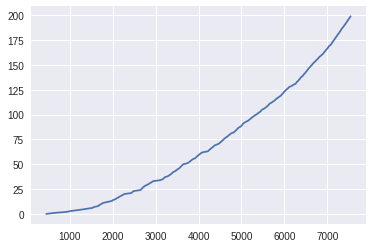

In [5]:
plt.plot(lengths,range(200));

In [6]:
print("Average episode length after convergence is {}".format(agent.getAverageEpisodeLength(5000,0.0)))

Average episode length after convergence is 15.0


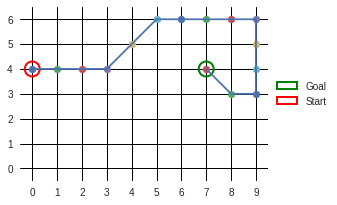

In [7]:
gridworld.visualizeTrajectory( agent.generateEpisode(0.0)[0]);

The following cells contain the solution to exercise 6.9 which is specified in the book as follows :
>"*Exercise 6.9: Windy Gridworld with King’s Moves (programming)* Re-solve the windy
gridworld assuming eight possible actions, including the diagonal moves, rather than the usual four. How much better can you do with the extra actions? Can you do even better
by including a ninth action that causes no movement at all other than that caused by
the wind? "

Windy gridworld using 8 actions :

In [0]:
actions=np.array(list(itertools.product([-1,0,1],[-1,0,1])))
actions=actions[np.where(actions.any(axis=1)!=0)]

gridworld=GridWorld((10,7),actions,variance=0.0)
agent=SarsaAgent(gridworld)
lengths=agent.policyControl(200,0.1,0.7,0.5)

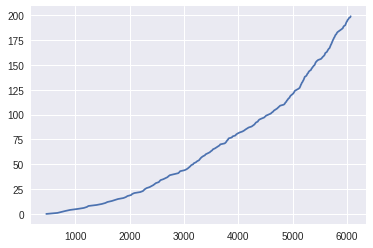

In [9]:
plt.plot(lengths,range(200));

In [10]:
print("Average episode length after convergence is {}".format(agent.getAverageEpisodeLength(5000,0.0)))

Average episode length after convergence is 8.0


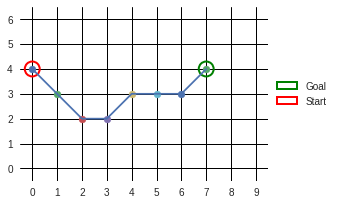

In [11]:
gridworld.visualizeTrajectory( agent.generateEpisode(0.0)[0]);

Windy gridworld using 9 actions :

In [0]:
actions=np.array(list(itertools.product([-1,0,1],[-1,0,1])))
gridworld=GridWorld((10,7),actions,variance=0.0)
agent=SarsaAgent(gridworld)
lengths=agent.policyControl(200,0.1,0.7,0.5)

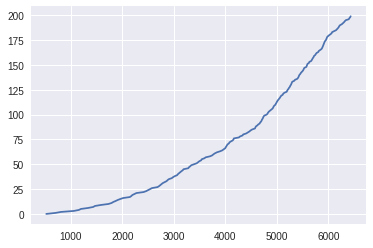

In [13]:
plt.plot(lengths,range(200));

In [14]:
print("Average episode length after convergence is {}".format(agent.getAverageEpisodeLength(5000,0.0)))

Average episode length after convergence is 9.0


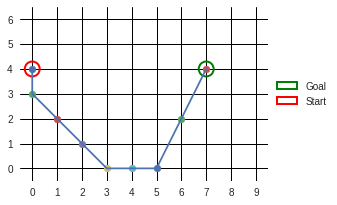

In [15]:
gridworld.visualizeTrajectory( agent.generateEpisode(0.0)[0]);

It seems that adding king's moves allowed the agent to reach a better average episode length which is 8 steps per episode, however adding the ninth action of no movement did not improve the agent over the 8 actions case.

The following cells contain the solution to exercise 6.10 which is specified in the book as follows :
>"*Exercise 6.10: Stochastic Wind (programming)* Re-solve the windy gridworld task with
King’s moves, assuming that the e↵ect of the wind, if there is any, is stochastic, sometimes
varying by 1 from the mean values given for each column. That is, a third of the time
you move exactly according to these values, as in the previous exercise, but also a third
of the time you move one cell above that, and another third of the time you move one
cell below that. For example, if you are one cell to the right of the goal and you move
left, then one-third of the time you move one cell above the goal, one-third of the time
you move two cells above the goal, and one-third of the time you move to the goal."

For this case we use a larger number of episodes during control, since this is more difficult task than the previous case.

Stochastic windy grid world using 4 actions :


In [0]:
actions=np.array(list(itertools.product([-1,0,1],[-1,0,1])))
actions=actions[np.where(np.logical_and(actions.any(axis=1)!=0,actions.all(axis=1)==0))]

gridworld=GridWorld((10,7),actions,variance=1.0)
agent=SarsaAgent(gridworld)
lengths=agent.policyControl(2000,0.1,0.7,0.5)

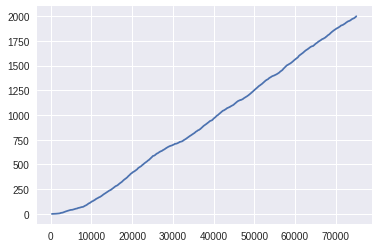

In [17]:
plt.plot(lengths,range(2000));

In [18]:
print("Average episode length after convergence is {}".format(agent.getAverageEpisodeLength(5000,0.0)))

Average episode length after convergence is 34.2596


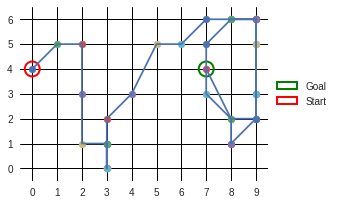

In [19]:
gridworld.visualizeTrajectory( agent.generateEpisode(0.0)[0]);

Stochastic windy gridworld using 8 actions :

In [0]:
actions=np.array(list(itertools.product([-1,0,1],[-1,0,1])))
actions=actions[np.where(actions.any(axis=1)!=0)]

gridworld=GridWorld((10,7),actions,variance=1.0)
agent=SarsaAgent(gridworld)
lengths=agent.policyControl(2000,0.1,0.7,0.5)

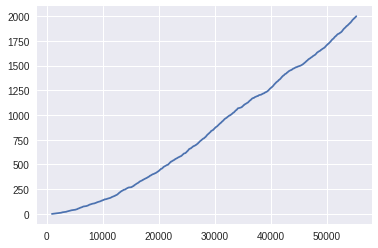

In [21]:
plt.plot(lengths,range(2000));

In [22]:
print("Average episode length after convergence is {}".format(agent.getAverageEpisodeLength(5000,0.0)))

Average episode length after convergence is 14.316


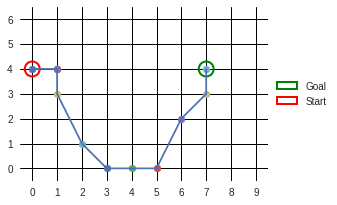

In [23]:
gridworld.visualizeTrajectory( agent.generateEpisode(0.0)[0]);

Stochastic windy gridworld using 9 actions

In [0]:
actions=np.array(list(itertools.product([-1,0,1],[-1,0,1])))
gridworld=GridWorld((10,7),actions,variance=1.0)
agent=SarsaAgent(gridworld)
lengths=agent.policyControl(2000,0.1,0.7,0.5)

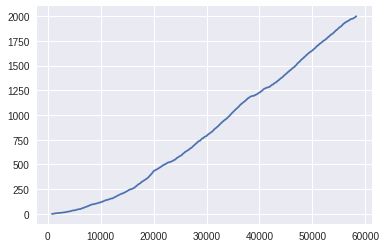

In [25]:
plt.plot(lengths,range(2000));

In [26]:
print("Average episode length after convergence is {}".format(agent.getAverageEpisodeLength(5000,0.0)))

Average episode length after convergence is 17.8184


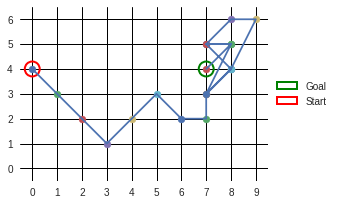

In [27]:
gridworld.visualizeTrajectory( agent.generateEpisode(0.0)[0]);